In [1]:
# Importamos librerías
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargamos los datos
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Limpiamos los datos
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Usamos una función de Pandas para transformar la columna de 'str' a 'datetime'
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Usamos un módulo de Python para transformar la columna de 'str' a 'list'

In [2]:
# Creamos un DataFrame que contenga sólo los trabajos ubicados en Argentina
df_ARG = df[df['job_country'] == 'Argentina']

In [3]:
# Desglosamos cada trabajo por skill requerida
df_skills = df_ARG.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
236,Científico de Datos LLM,None
417,Data Science SR Puerto Madero,java
417,Data Science SR Puerto Madero,scala
863,Data Engineer Jr,python
863,Data Engineer Jr,azure
...,...,...
785668,Jr Data Analyst,excel
785668,Jr Data Analyst,tableau
785668,Jr Data Analyst,power bi
785668,Jr Data Analyst,spss


In [4]:
# Agrupamos por skill y nombre del trabajo contando el número de ocurrencias
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Asignamos nombre pertinente a la columna
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Ordenamos los valores de manera descendente
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1054,sql,Data Engineer,1424
822,python,Data Engineer,1401
823,python,Data Scientist,1048
1055,sql,Data Scientist,930
71,aws,Data Engineer,803
...,...,...,...
730,pascal,Software Engineer,1
528,kotlin,Business Analyst,1
529,kotlin,Cloud Engineer,1
356,gdpr,Business Analyst,1


In [5]:
# Filtramos para obtener los top 3 trabajos

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

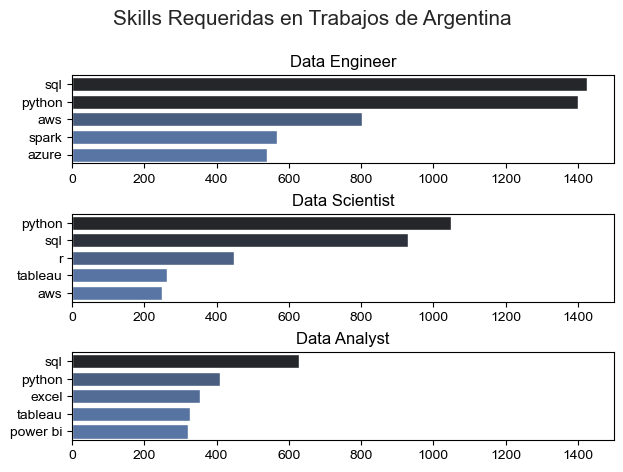

In [6]:
# Realizamos las visualizaciones de interés
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 1500)

fig.suptitle('Skills Requeridas en Trabajos de Argentina', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [7]:
# Creamos un df que obtenga las ocurrencias de cada trabajo
df_job_title_count = df_ARG['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,2265
1,Data Scientist,1617
2,Data Analyst,1273
3,Software Engineer,1267
4,Senior Data Engineer,647
5,Business Analyst,453
6,Senior Data Scientist,350
7,Cloud Engineer,322
8,Machine Learning Engineer,287
9,Senior Data Analyst,255


In [8]:
# Unimos los dos df
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100*df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,1424,2265,62.869757
1,python,Data Engineer,1401,2265,61.854305
2,python,Data Scientist,1048,1617,64.811379
3,sql,Data Scientist,930,1617,57.513915
4,aws,Data Engineer,803,2265,35.452539
...,...,...,...,...,...
1261,pascal,Software Engineer,1,1267,0.078927
1262,kotlin,Business Analyst,1,453,0.220751
1263,kotlin,Cloud Engineer,1,322,0.310559
1264,gdpr,Business Analyst,1,453,0.220751


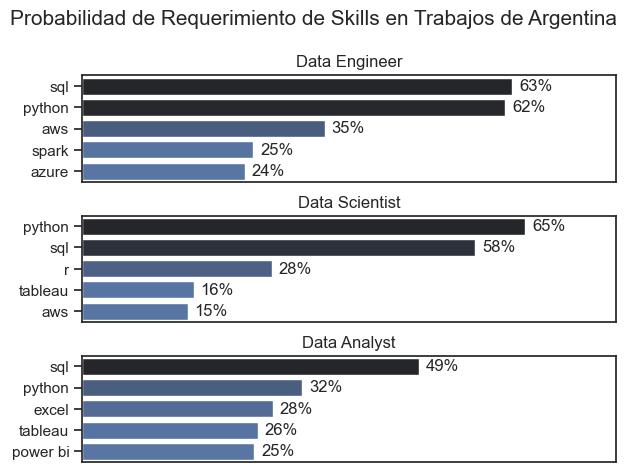

In [9]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Probabilidad de Requerimiento de Skills en Trabajos de Argentina', fontsize=15)
fig.tight_layout(h_pad=0.8)
plt.show()